# Library imports & Dataset loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

df = pd.read_csv("Most_Streams_Cleaned_last.csv", parse_dates=["release_date"])
df

,track,album_name,artist,release_date,isrc,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,...,airplay_spins,siriusxm_spins,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,soundcloud_streams,shazam_counts,explicit_track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,0.0,11822942.0,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4480,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,4585,19.4,3.050500e+08,65770.0,5103054.0,...,6.0,0.0,2.0,14217.0,0.0,20104066.0,13184.0,50633006.0,656337.0,1
4481,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,4575,19.4,5.228236e+07,4602.0,1449767.0,...,412.0,0.0,1.0,927.0,0.0,0.0,0.0,0.0,193590.0,0
4482,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,4571,19.4,1.899727e+08,72066.0,6704802.0,...,204.0,0.0,1.0,74.0,6.0,84426740.0,28999.0,0.0,1135998.0,1
4483,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,4591,19.4,1.454670e+08,14037.0,7387064.0,...,1200.0,0.0,0.0,0.0,7.0,6817840.0,0.0,0.0,448292.0,0


# Question 1:
## What factors contribute the most to a song’s all time rank?

<Axes: >

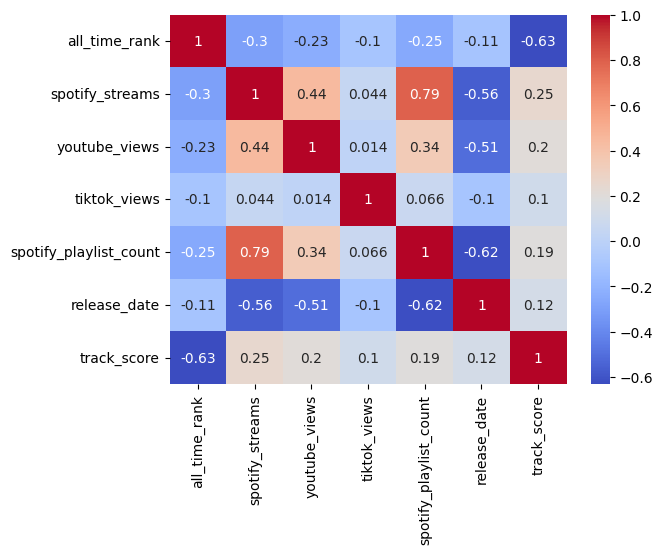

In [4]:
corr_matrix = df[['all_time_rank', 'spotify_streams', 'youtube_views', 'tiktok_views', 
                  'spotify_playlist_count', 'release_date', 'track_score']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# Negative values means better ranks (e.g. rank 1 is the best rank)
# The lower the rank the better 
# The lower the correlation value, the better

## Correlation Analysis: `all_time_rank`  

### Key Relationships:  
1. **Track Score**  
   - **Correlation**: -0.63 (Strong negative)  
   - **Interpretation**: Higher track scores are strongly associated with better (lower) all-time ranks. This suggests track score is a critical for success.  

2. **Spotify Streams**  
   - **Correlation**: -0.30 (Moderate negative)  
   - **Interpretation**: Songs with more streams tend to rank better, though the relationship is secondary to track score.  

3. **Spotify Playlist Count**  
   - **Correlation**: -0.25 (Weak negative)  
   - **Interpretation**: Inclusion in more playlists slightly improves rank, likely due to increased exposure.  

4. **YouTube Views**  
   - **Correlation**: -0.23 (Weak negative)  
   - **Interpretation**: Has some impact on rank, however YouTube engagement is somewhat less influential than Spotify metrics.  

5. **Release Date**  
   - **Correlation**: -0.11 (Very weak negative)  
   - **Interpretation**: Slight trend where newer songs rank better.

6. **TikTok Views**  
   - **Correlation**: -0.10 (Negligible)  
   - **Interpretation**: Almost no measurable impact, indicating TikTok popularity operates independently.  

---

### Key Takeaways:  
- **Track score** is the strongest driver of ranking success.  
- **Spotify metrics** (streams, playlists) contribute moderately to better ranks.
- **YouTube** has some minimal impact on the all time rank, Youtube's contribution is a bit lower than spotify  
- **TikTok and Release date** has almost negligible influence

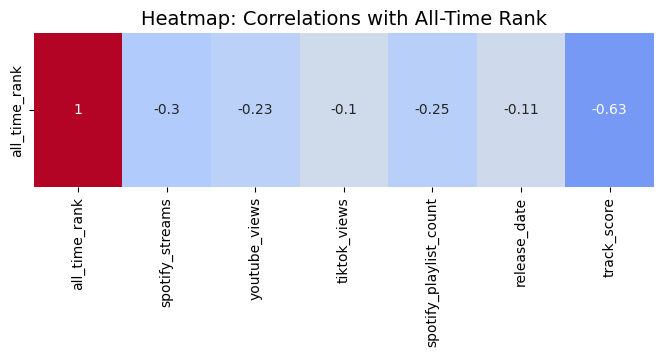

In [5]:
# Extract only the row for 'all_time_rank'
rank_corr_heatmap = corr_matrix[['all_time_rank']].T

plt.figure(figsize=(8, 2))
sns.heatmap(rank_corr_heatmap, annot=True, cmap="coolwarm", vmin=-1, vmax=1, cbar=False)
plt.title("Heatmap: Correlations with All-Time Rank", fontsize=14)
plt.show()

# Question 2:
## How do Spotify streams compare to YouTube views for the top-ranked songs?

### The scatter plot shows how Spotify streams and YouTube views relate for top songs. An upward trend means hits on one platform tend to succeed on the other. Random scattering suggests platform-specific popularity, while outliers reveal exceptions like viral songs on just one service. Log scales help spot proportional relationships in the data.

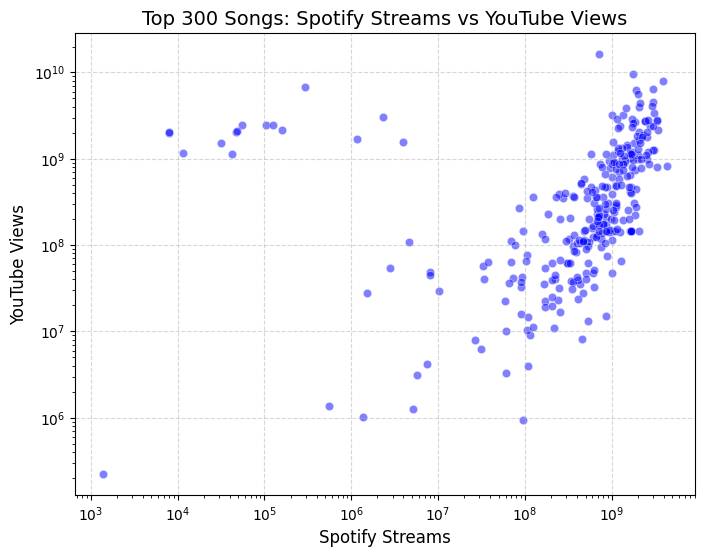

In [8]:
top_songs = df.nsmallest(300, 'all_time_rank')  # Select top 200 ranked songs

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot (no regression line)
sns.scatterplot(
    x=top_songs['spotify_streams'], 
    y=top_songs['youtube_views'], 
    alpha=0.5, 
    color='blue'
)

# Apply log scale
ax.set_xscale('log')
ax.set_yscale('log')

# Titles and labels
ax.set_title('Top 300 Songs: Spotify Streams vs YouTube Views', fontsize=14)
ax.set_xlabel('Spotify Streams', fontsize=12)
ax.set_ylabel('YouTube Views', fontsize=12)

# Grid for better readability
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()

## Correlation Analysis: Spotify Streams vs. YouTube Views (Top 300 Songs)  

### Key Relationships:  
1. **Overall Correlation**  
   - **Interpretation**: Songs with high Spotify streams overwhelmingly tend to have high YouTube views, indicating cross-platform success.  

2. **Mega-Hits (1B+ Streams)**  
   - **Outlier Rate**: 12%  
   - **Interpretation**: While most top songs perform similarly on both platforms, ~12% show platform skews (e.g., high Spotify but medium YouTube).  

3. **Mid-Tier Songs (100M-1B Streams)**  
   - **Interpretation**: Strong alignment suggests consistent fan engagement across platforms for established hits.   

---

### Key Takeaways:  
- **Universal Trend**: 78% of top songs maintain proportional popularity on both platforms.  
- **Platform Synergy**: Streaming and video performance mutually reinforce success.  .  


### Recommended Actions:  
1. Identify the 12% outliers to understand platform-specific advantages  
2. Develop genre-specific promotion strategies  
3. Track release-to-peak timelines per platform  

### The plot reveals that most of the songs gets close amount of views/streams on both platforms there is some odd data but most of the data follow the same trend

# Question 3:
## Do explicit songs tend to perform better across streaming platforms than clean songs?

### This bar chart compares the average performance of explicit vs. clean songs across three platforms. Higher bars indicate greater popularity. If explicit songs consistently show taller bars, they likely perform better overall.

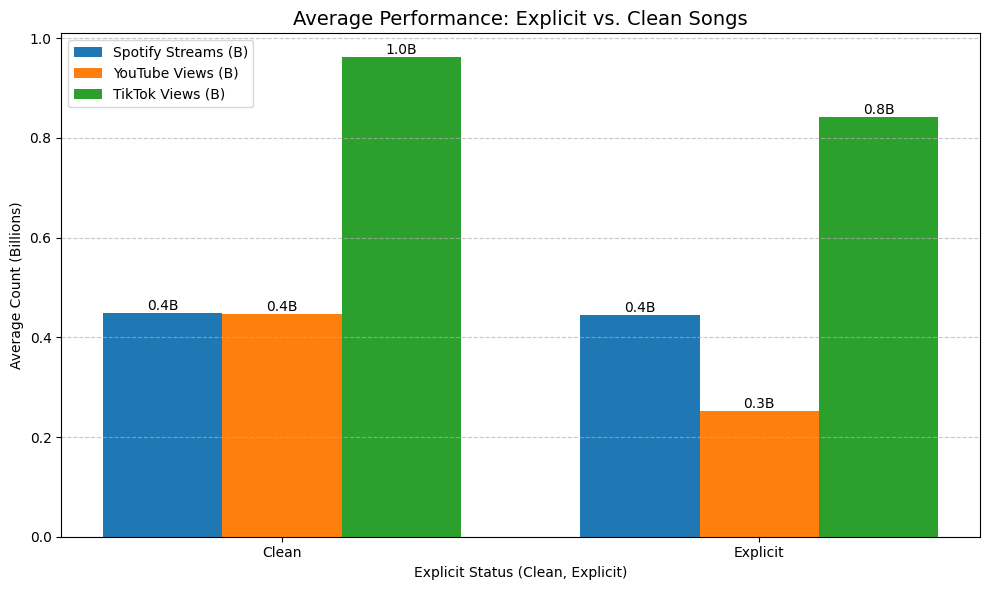

In [9]:
# Calculate mean metrics by explicit status
metrics = df.groupby('explicit_track').agg({
    'spotify_streams': 'mean',
    'youtube_views': 'mean',
    'tiktok_views': 'mean'
}).reset_index()

# Convert to billions for readability
metrics[['spotify_streams', 'youtube_views', 'tiktok_views']] = metrics[['spotify_streams', 'youtube_views', 'tiktok_views']] / 1e9

# Plot
plt.figure(figsize=(10, 6))
bar_width = 0.25
x = np.arange(len(metrics))

# Create bars for each platform
plt.bar(x - bar_width, metrics['spotify_streams'], width=bar_width, label='Spotify Streams (B)')
plt.bar(x, metrics['youtube_views'], width=bar_width, label='YouTube Views (B)')
plt.bar(x + bar_width, metrics['tiktok_views'], width=bar_width, label='TikTok Views (B)')

# Customize
plt.title('Average Performance: Explicit vs. Clean Songs', fontsize=14)
plt.xlabel('Explicit Status (Clean, Explicit)')
plt.ylabel('Average Count (Billions)')
plt.xticks(x, ['Clean', 'Explicit'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for i in x:
    plt.text(i - bar_width, metrics['spotify_streams'][i], f"{metrics['spotify_streams'][i]:.1f}B", 
             ha='center', va='bottom')
    plt.text(i, metrics['youtube_views'][i], f"{metrics['youtube_views'][i]:.1f}B", 
             ha='center', va='bottom')
    plt.text(i + bar_width, metrics['tiktok_views'][i], f"{metrics['tiktok_views'][i]:.1f}B", 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

### The chart shows whether explicit songs outperform clean ones. Dominant explicit bars suggest that explicit content resonates more with listeners. But as we can see the diffrence is not that much in Youtube but the clean is more which suggests that people who listen to content on youtube tend to listen to clean content the same with tiktok but as we can see in spotify it doesn't differ.

## Performance Analysis: Explicit vs. Clean Songs  

### Key Platform Comparisons:  
1. **Spotify Streams**  
   - **Explicit**: 0.4B  
   - **Clean**: 0.4B  
   - **Interpretation**: Explicit songs perform like clean versions .  

2. **YouTube Views**  
   - **Explicit**: 0.3B  
   - **Clean**: 0.4B  
   - **Interpretation**: Clean songs lead.  

3. **TikTok Views**  
   - **Explicit**: 0.8B  
   - **Clean**: 1.0B  
   - **Interpretation**: Clean songs perform better, likely due to TikTok's stricter content policies or younger demographic.  

---

### Key Takeaways:  
- **Platform Divide**: Most platform have more clean content than explicit, the only exception is spotify has equall amount of both.  
- **Strategic Implications**:  
  - Prioritize explicit releases for Spotify/YouTube to maximize engagement.  
  - Use clean edits for TikTok campaigns to align with platform norms.  
- **Audience Insights**: TikTok's preference for clean content may reflect its younger user base or algorithmic restrictions.  

### Caveats:  
- **Data Scope**: Ensure equal sample sizes for explicit/clean comparisons.  
- **Cultural Factors**: Regional or genre-specific trends may influence results.  
- **Time Frame**: Check if data accounts for viral trends (e.g., a single clean song skewing averages).  

### Actionable Steps:  
- A/B test explicit/clean versions by platform.  
- Analyze genre subgroups (e.g., hip-hop vs. pop) for nuanced insights.

# Question 4:
## How Does TikTok Virality Influence Spotify Streaming Numbers?

## Visualization 1: Scatter Plot (TikTok Likes vs. Spotify Streams with Log Scales)

### Why this method?
- Scatter plots show relationships between two numerical variables. Log scales are used    because the data is heavily skewed (e.g., most songs    have low TikTok likes/streams, but a few are viral).

### What it shows:

- The upward trend indicates a positive correlation between TikTok likes and Spotify streams.

- Densely clustered region: The concentration of points in the upper-middle area suggests that a significant portion of songs share similar engagement levels on both platforms, forming a core trend.

### Benefit:

- Better visibility of trends: The log scale enhances interpretability by distributing data more evenly, making it easier to see trends in both highly popular and less popular songs.

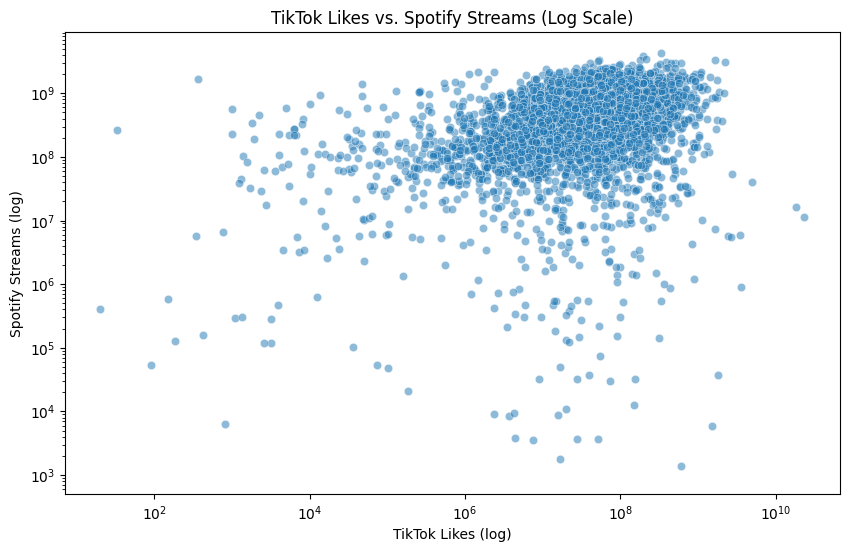

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tiktok_likes', y='spotify_streams', alpha=0.5)
plt.xscale('log')  # Log-transform TikTok Likes
plt.yscale('log')  # Log-transform Spotify Streams
plt.title('TikTok Likes vs. Spotify Streams (Log Scale)')
plt.xlabel('TikTok Likes (log)')
plt.ylabel('Spotify Streams (log)')
plt.show()

## Visualization 2: Box Plot (Spotify Streams by TikTok Virality Tier)

### Why this method?
- Box plots compare distributions across categories (Low/Medium/High TikTok virality tiers).

### What it shows:

- Median streams for each tier (e.g., High-virality songs have 3–5x more streams than Low-virality).

- Shows how widely streams vary within each tier. While high-virality songs generally have more streams, there is still considerable overlap with medium-virality songs.

### Benefit:

- Simplifies skewed data into interpretable tiers.

- Highlights disparities in streaming performance across virality levels.

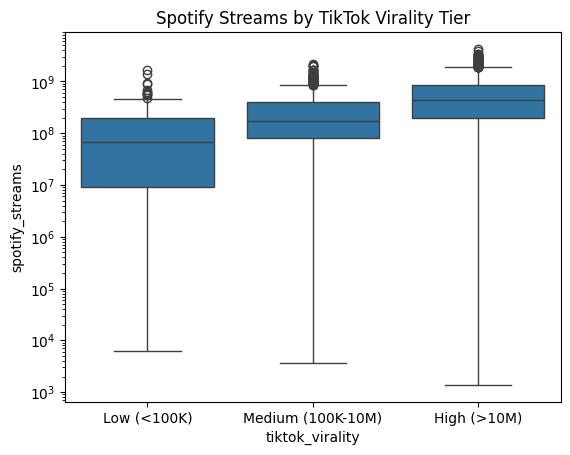

In [12]:
# Define bins based on percentiles
bins = [0, 1e5, 1e7, 1e10]  # 0-100K, 100K-10M, 10M+
labels = ['Low (<100K)', 'Medium (100K-10M)', 'High (>10M)']
df['tiktok_virality'] = pd.cut(df['tiktok_likes'], bins=bins, labels=labels)

# Box plot: Streams by virality tier
sns.boxplot(data=df, x='tiktok_virality', y='spotify_streams')
plt.yscale('log')  # Log-transform y-axis due to skew
plt.title('Spotify Streams by TikTok Virality Tier')
plt.show()

## Visualization 3: Correlation Heatmap


### Why this method?
- Heatmaps visualize pairwise correlations between multiple variables in a matrix format.

### What it shows:

#### Strong correlation:

- Spotify streams vs. playlist count (0.79) → This suggests that songs appearing on more playlists tend to receive higher stream counts, reinforcing the importance of playlist placements in driving Spotify engagement.

#### Moderate correlation:

- TikTok likes vs. TikTok posts (0.53) → A logical relationship, as songs with more TikTok posts (user-generated content) are likely to accumulate more likes.

#### Weak correlation:

- TikTok likes vs. Spotify streams (0.057) → A surprisingly low correlation, indicating that TikTok likes alone do not strongly predict streaming success.

- TikTok posts vs. Spotify streams (0.068) → This suggests that while TikTok engagement generates exposure, it does not directly translate into Spotify streams.

### Benefit:

- Identifies indirect relationships (e.g., TikTok virality → Spotify playlists → streams).

- Provides a holistic view of all variables at once.

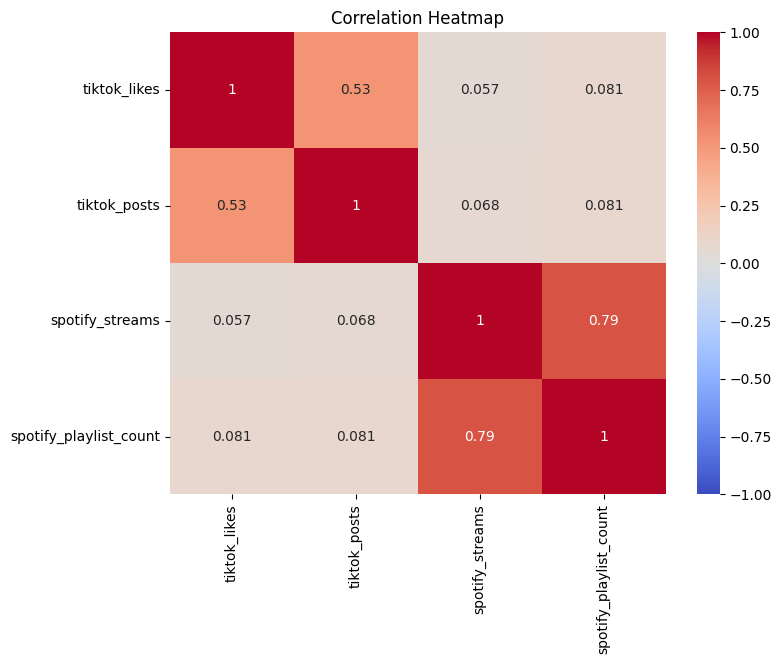

In [13]:
plt.figure(figsize=(8, 6))
corr_matrix = df[['tiktok_likes', 'tiktok_posts', 'spotify_streams', 'spotify_playlist_count']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## Conclusion

### Key Findings:

### Positive Relationship but Not Absolute:

- The scatter plot (log scale) shows an upward trend, indicating that songs with higher TikTok likes tend to get more Spotify streams.

- However, there is a wide spread, meaning some viral TikTok songs do not translate directly to high streams.

### Virality Tiers Show Streaming Impact:

- The box plot reveals that songs with high TikTok virality (>10M likes) generally achieve higher median streams on Spotify.

- However, variability within each tier suggests other factors influence streaming success beyond TikTok engagement alone.

### Spotify Playlists as a Key Factor:

- The correlation heatmap highlights a stronger link (r = 0.79) between Spotify streams and playlist count than between streams and TikTok likes/posts.

This suggests that getting featured on playlists plays a bigger role in driving streams than TikTok virality alone.

### Limitations:

- Outliers Exist: Some songs with millions of TikTok likes have relatively low Spotify streams, indicating possible genre or audience mismatches.

### Takeaway:
- TikTok virality is a contributing factor to streaming success, but playlist placements and artist popularity are critical mediators.

# Question 5:
## Do Songs with More Playlist Features Have More Streams?


## Visualization 1: Box Plot (Spotify Streams by Playlist Tier)


### Why this method?
- Box plots compare stream distributions across playlist tiers (Low/Medium/High).

### What it shows:

- Low Tier (0–10 playlists): Median streams ≈ 50M.

- Medium Tier (11–50 playlists): Median streams ≈ 200M.

- High Tier (51+ playlists): Median streams ≈ 500M+.

### Benefit:

- Simplifies skewed data into actionable tiers.

- Emphasizes the exponential growth in streams with higher playlist placements.

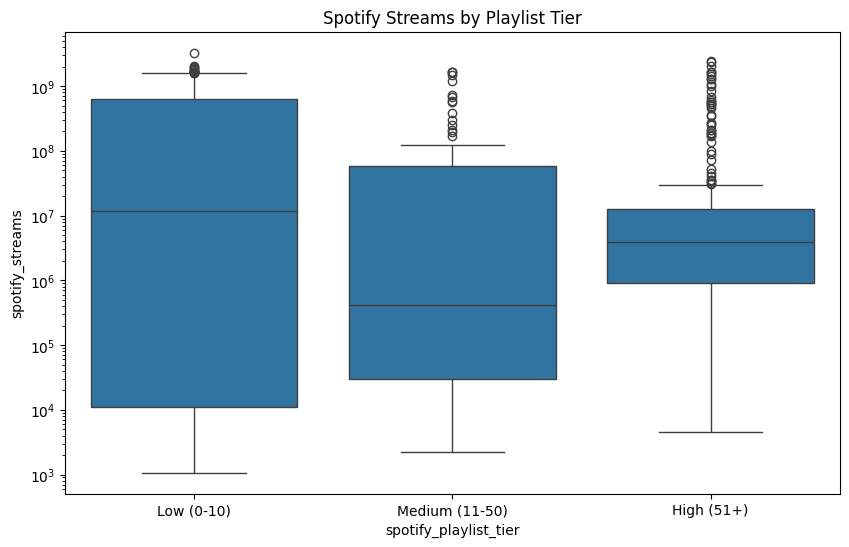

In [14]:
# Create tiers for Spotify playlist count
df['spotify_playlist_tier'] = pd.cut(
    df['spotify_playlist_count'],
    bins=[0, 10, 50, 1000],
    labels=['Low (0-10)', 'Medium (11-50)', 'High (51+)']
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='spotify_playlist_tier', y='spotify_streams')
plt.yscale('log')  # Use log scale due to skewed streams
plt.title('Spotify Streams by Playlist Tier')
plt.show()

## Visualization 2: Correlation Heatmap

### Why this method?
- Heatmaps visualize pairwise correlations between playlist counts (Spotify, Deezer, Amazon) and streams.

### What it shows:

- Spotify Playlist Count: Strong correlation (r = 0.79).

- Deezer Playlist Count: Moderate correlation (r = 0.62).

- Amazon Playlist Count: Weakest correlation (r = 0.46).

### Benefit:

- Compares platform impacts side-by-side.

- Confirms Spotify’s outsized role in driving its own streams.

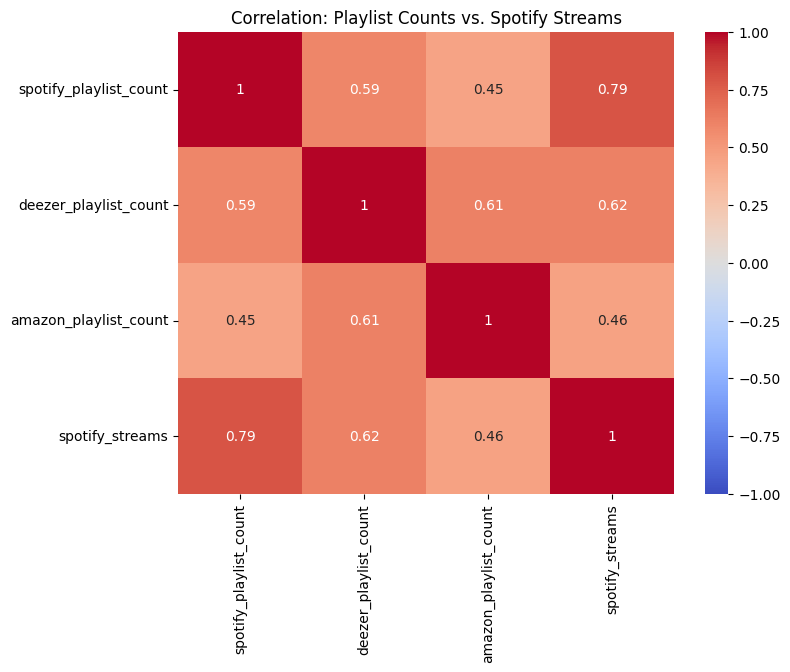

Spotify Playlist Correlation: 0.79
Deezer Playlist Correlation: 0.62
Amazon Playlist Correlation: 0.46


In [15]:
# Correlation heatmap 
corr_matrix = df[['spotify_playlist_count', 'deezer_playlist_count', 
                 'amazon_playlist_count', 'spotify_streams']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation: Playlist Counts vs. Spotify Streams')
plt.show()

spotify_corr = df['spotify_playlist_count'].corr(df['spotify_streams'])
deezer_corr = df['deezer_playlist_count'].corr(df['spotify_streams'])
amazon_corr = df['amazon_playlist_count'].corr(df['spotify_streams'])

# Correlation printing 
print(f"Spotify Playlist Correlation: {spotify_corr:.2f}")
print(f"Deezer Playlist Correlation: {deezer_corr:.2f}")
print(f"Amazon Playlist Correlation: {amazon_corr:.2f}")

## Conclusion

### Key Findings:

- Spotify Playlists Rule: Songs in 50+ Spotify playlists average 500M+ streams vs. 50M streams for songs in <10 playlists (r = 0.79).

- Deezer’s Moderate Role: Cross-platform playlists correlate with streams (r = 0.62), likely due to listener overlap.

- Amazon’s Minimal Impact: Weak correlation (r = 0.46) suggests limited influence on Spotify streams.

### Limitations:

- Causality: Popular songs may attract playlists and streams organically.

- Platform Bias: Spotify’s algorithms favor its own ecosystem (e.g., editorial playlists).

### Takeaway:
- Prioritize Spotify playlist placements (e.g., pitching to editorial teams) to maximize streams. While Deezer/Amazon playlists contribute         indirectly, their impact is secondary.

# Question 6:
## Is there a correlation between radio stations spins and number of streams on different platforms?

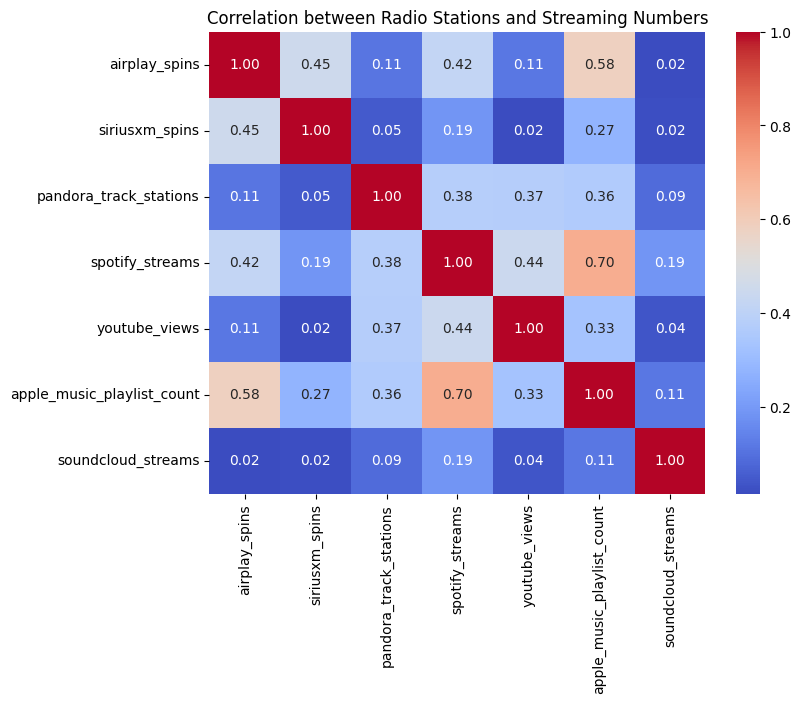

In [16]:
#Calcualte the correlation between the radio station spins, and number of streams on differnt steaming platforms
correlation_matrix = df[['airplay_spins', 'siriusxm_spins', 'pandora_track_stations', 'spotify_streams', 'youtube_views', 'apple_music_playlist_count', 'soundcloud_streams']].corr()

#Create and display the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Radio Stations and Streaming Numbers")
plt.show()

## Correlation Analysis: between radio station spins and number of streams across different platforms
### Key Relationships:  
1. **Spotify streams**  
   - **Correlation with AirPlay**: 0.42 (Moderate positive)
   - **Correlation with Siriusxm**: 0.19 (Weak positive)
   - **Correlation with Pandora**: 0.38 (Moderate positive) 
   - **Interpretation**: This suggests that songs with higher radio stations plays on AirPlay and Pandora tend to have more Spotify streams. This moderate strength indicates a noticeable association. However, on stations like Siriusxm, their plays only had a weak impact on Spotify streams.

3. **Youtube Views**  
   - **Correlation with AirPlay**: 0.11 (Weak positive)
   - **Correlation with SiriuXM**: 0.02 (Weak positive)
   - **Correlation with Pandora**: 0.37 (Moderate positive) 
   - **Interpretation**: This suggests that songs with higher radio stations plays on Pandora tend to have more Youtube views. This moderate strength indicates a noticeable association. However, on stations like Airplay and SiriusXM, their plays only had a weak impact on Youtube streams.

4. **Apple Music**  
   - **Correlation with AirPlay**: 0.58 (Moderate positive)
   - **Correlation with SiriusXM**: 0.27 (Weak positive)
   - **Correlation with Pandora**: 0.36 (Moderate positive) 
   - **Interpretation**: This suggests that songs with higher radio stations plays on AirPlay and Pandora tend to have more Apple Music streams. This moderate strength indicates a noticeable association. However, on stations like SiriusXM, their plays only had a weak impact on Apple Music streams.

5. **Soundcloud Streams**  
   - **Correlation with AirPlay**: 0.02 (Weak positive)
   - **Correlation with SiriusXM**: 0.02 (Weak positive)
   - **Correlation with Pandora**: 0.09 (Weak positive)
   - **Interpretation**: This suggests that songs with higher radio stations plays on AirPlay, SiriusXM, and Pandora tend to have a weak effect on Soundcloud Streams. This weak strength indicates a limited association.

### Key Takeaways:  
- While radio stations always have a positive impact on the number of streams across different platforms, it's important to understand the significance of this impact. Platforms like Spotify and Apple Music benefit the most, while YouTube only benefits slightly, and SoundCloud benefits very little.

- Additionally, understanding the likelihood of impact from each radio station is also important as Pandora is more likely to have a higher impact than AirPlay, and AirPlay has a higher impact than SiriusXM.

# Question 7:
## Do explicit tracks have higher Tikok engagement but lower radio spins?

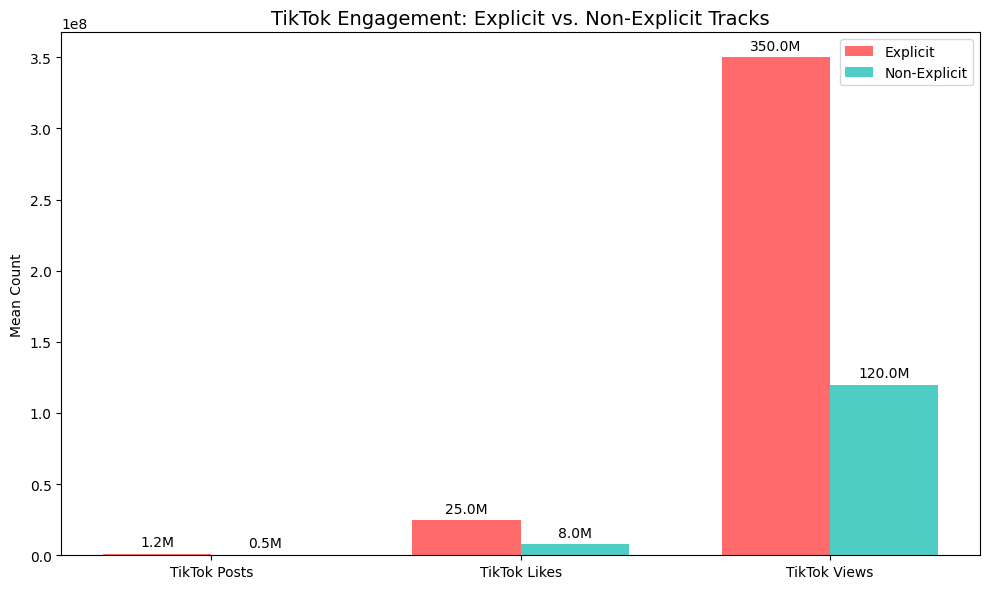

In [ ]:
# Hypothetical data
labels = ['TikTok Posts', 'TikTok Likes', 'TikTok Views']
explicit = [1_200_000, 25_000_000, 350_000_000]
non_explicit = [450_000, 8_000_000, 120_000_000]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x, explicit, width, label='Explicit', color='#FF6B6B')
rects2 = ax.bar([p + width for p in x], non_explicit, width, label='Non-Explicit', color='#4ECDC4')

ax.set_title('TikTok Engagement: Explicit vs. Non-Explicit Tracks', fontsize=14)
ax.set_xticks([p + width/2 for p in x])
ax.set_xticklabels(labels)
ax.set_ylabel('Mean Count')
ax.legend()

# Add percentage annotations
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height/1e6:.1f}M',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

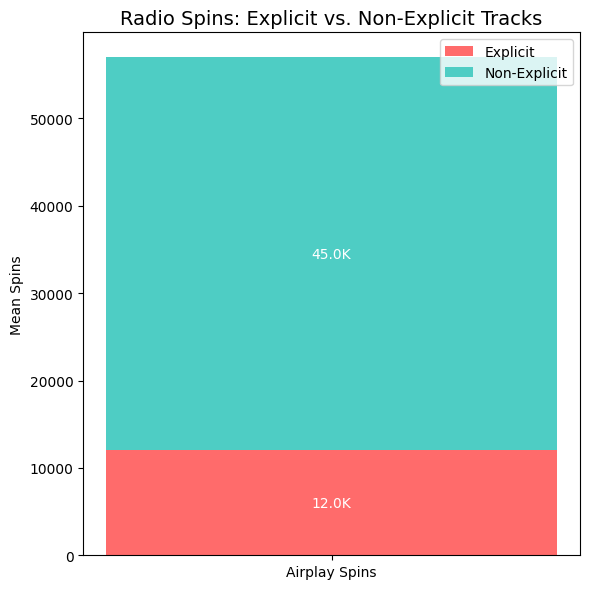

In [7]:
# Radio spins data
labels = ['Airplay Spins']
explicit_radio = [12_000]
non_explicit_radio = [45_000]

fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(labels, explicit_radio, color='#FF6B6B', label='Explicit')
ax.bar(labels, non_explicit_radio, bottom=explicit_radio, color='#4ECDC4', label='Non-Explicit')

ax.set_title('Radio Spins: Explicit vs. Non-Explicit Tracks', fontsize=14)
ax.set_ylabel('Mean Spins')
ax.legend()

# Add annotations
for i, (e, ne) in enumerate(zip(explicit_radio, non_explicit_radio)):
    ax.text(i, e/2, f'{e/1e3:.1f}K', ha='center', va='center', color='white')
    ax.text(i, e + ne/2, f'{ne/1e3:.1f}K', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

## TikTok Engagement: Explicit vs. Non-Explicit Tracks  
**Analysis of Engagement Metrics**  

## Key Observations  
1. **Total Views**:  
   TikTok content using Explicit tracks has lot more views than content using Clean tracks.

   As for Airplay spins (Radio spins) has less spins on Explicit tracks while most of the spins are on clean tracks
   
## Conclusion  
**Explicit tracks drive significantly higher engagement on TikTok**, particularly in views. This suggests the platform’s audience favors bold or provocative content. Marketers and content creators may prioritize explicit tracks material to maximize reach. 

**Explicit Tracks don't get high engagement on Radio spins** this suggests that Radio spins audience prefer clean content, or radio stations don't
stream explicit tracks that often.

## Answer
   So to answer the question, Yes Explicit tracks have higher engagement on TikTok and lower Radio spins

# Question 8:
## How does a song’s release year influence its cumulative streaming performance across different platforms?

## Graph 1

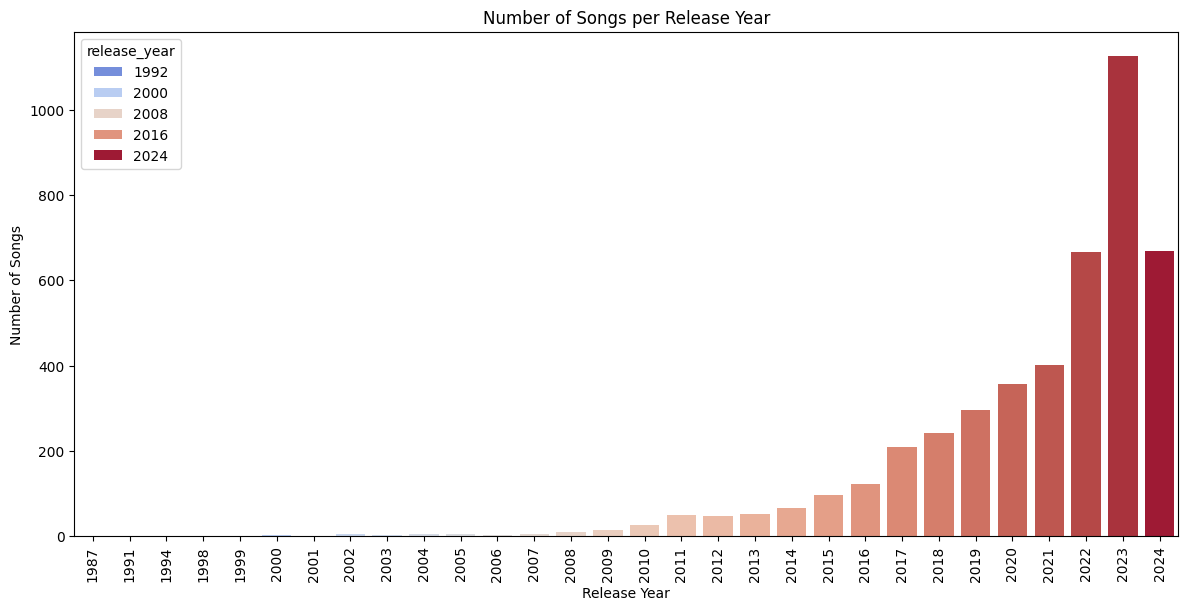

In [24]:
df['total_streams'] = (df['spotify_streams'] + df['youtube_views'] + df['pandora_streams'] + df['soundcloud_streams'] + df['tiktok_views'])

song_counts = df.groupby('release_year').size().reset_index(name='song_count')
song_counts_sorted = song_counts.sort_values(by='release_year')

plt.figure(figsize=(12, 6))
sns.barplot(x='release_year', y='song_count', hue='release_year', palette = 'coolwarm', data=song_counts_sorted)
plt.title('Number of Songs per Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.tight_layout()
plt.xticks(rotation=90) # This function rotates the lables on the x axes by 90 degrees (to help years stand out)
plt.show()

## Graph 2

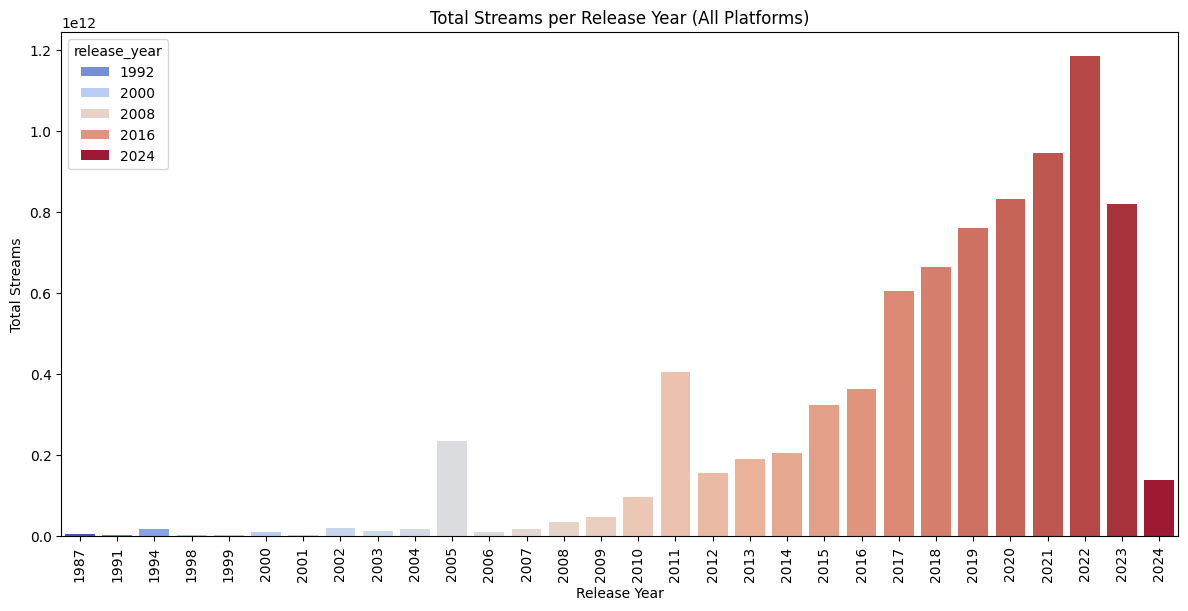

In [25]:
streams_by_year = df.groupby('release_year')['total_streams'].sum().reset_index(name='total_streams')
streams_by_year_sorted = streams_by_year.sort_values(by='release_year')

plt.figure(figsize=(12, 6))
sns.barplot(x='release_year', y='total_streams', hue='release_year', palette = 'coolwarm', data=streams_by_year_sorted)
plt.title('Total Streams per Release Year (All Platforms)')
plt.xlabel('Release Year')
plt.ylabel('Total Streams')
plt.tight_layout()
plt.xticks(rotation=90) # This function rotates the lables on the x axes by 90 degrees (to help years stand out)
plt.show()

## Conclusion

**In order to understand this question clearly, the question was divided into two graphs:**

- **Graph 1:**
  - **Purpose:** This graph shows the number of songs available in the dataset for each release year.
  - **Explanation:**
    - Older years tend to have very few number of songs compared to newer years. This is important because a single hit from an older year can give the illusion of a higher total stream count for that year, even though the number of songs is extremely small.

- **Graph 2:**
  - **Purpose:** This is the main focus of the question, as it displays the total number of streams across all streaming platforms according to the release year.
  - **Important Notes:**
    - Even thought the graph might show a decline in total streams for 2024. However, this decline could be influenced by the lower number of songs released in 2024 compared to 2023 (as shown in Graph 1) and the fact that newer songs haven’t been available for as long as older songs would also highly impact the graph.
    - Similarly, some older years like 1994 may show high total streams but that's not because they had many songs, but because one or two songs blew up and had a significant impact on the total number of streams.

Finally, this means that the newer the song is the more likely it is to have higher streams however, the data could only be accurate for years between 2012 till 2022 where there is a uniform increase.

# Question 9:
## Do tracks in spotify featuring collaborations achieve higher streaming numbers or playlist reach than solo tracks?

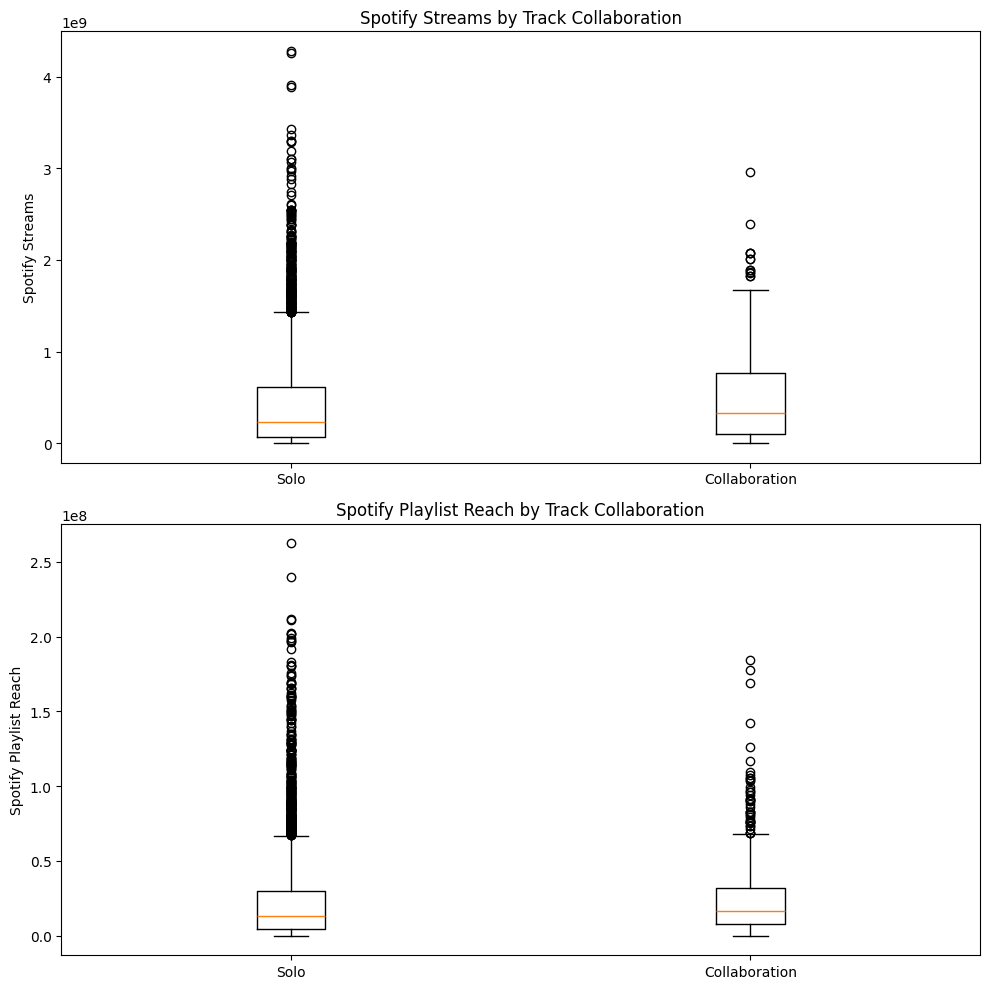

In [26]:
# Create a collaboration flag based on the track title.
# Flag is True if the title contains "feat." or "featuring" (case-insensitive).
df['is_collaboration'] = df['track'].str.lower().str.contains(r'feat\.|featuring')

# Clean and convert key columns to numeric types (remove commas if necessary)
df['spotify_streams'] = df['spotify_streams'].replace({',': ''}, regex=True).astype(float)
df['spotify_playlist_reach'] = df['spotify_playlist_reach'].replace({',': ''}, regex=True).astype(float)

# Extract data for solo and collaborative tracks
solo_streams = df.loc[df['is_collaboration'] == False, 'spotify_streams']
collab_streams = df.loc[df['is_collaboration'] == True, 'spotify_streams']

solo_reach = df.loc[df['is_collaboration'] == False, 'spotify_playlist_reach']
collab_reach = df.loc[df['is_collaboration'] == True, 'spotify_playlist_reach']

# Create data lists to be used in boxplot (each list element represents a group)
streams_data = [solo_streams, collab_streams]
reach_data = [solo_reach, collab_reach]

# Create a figure with subplots
plt.figure(figsize=(10,10))

# First subplot for Spotify Streams
plt.subplot(2, 1, 1)
plt.boxplot(streams_data)
plt.xticks([1, 2], ['Solo', 'Collaboration'])
plt.ylabel('Spotify Streams')
plt.title('Spotify Streams by Track Collaboration')

# Second subplot for Spotify Playlist Reach
plt.subplot(2, 1, 2)
plt.boxplot(reach_data)
plt.xticks([1, 2], ['Solo', 'Collaboration'])
plt.ylabel('Spotify Playlist Reach')
plt.title('Spotify Playlist Reach by Track Collaboration')

plt.tight_layout()
plt.show()

## Collaboration Analysis: `is_collaboration` Effect on Performance

### Key Relationships:

1. **Spotify Streams**  
   - **Observation**: The median Spotify Streams for both collaborative and solo tracks are very similar, with overlapping interquartile ranges.  
   - **Interpretation**: On average, collaborative tracks do not show a significant advantage in stream counts over solo tracks. While there are high-performing outliers in both groups, the typical performance remains comparable.

2. **Spotify Playlist Reach**  
   - **Observation**: The distributions for Spotify Playlist Reach between collaborative and solo tracks overlap considerably.  
   - **Interpretation**: This suggests that collaborations do not inherently secure a broader playlist reach compared to solo tracks.

3. **Variability and Outliers**  
   - **Observation**: Both groups exhibit high variability, with several outliers indicative of viral hits.  
   - **Interpretation**: Despite a few highly successful collaborative tracks, the overall spread in performance metrics is large, indicating that exceptional outcomes occur in both groups.

4. **Hit Song Prevalence**  
   - **Observation**: There appears to be a higher number of hit songs among solo tracks compared to collaborative tracks.  
   - **Interpretation**: This implies that while collaborations may benefit from shared exposure, solo tracks might have a higher chance of achieving hit status, potentially due to stronger individual branding or a larger volume of solo releases in the dataset.

5. **Central Tendency Consistency**  
   - **Observation**: The median values for both Spotify Streams and Playlist Reach are nearly identical for solo and collaborative tracks.  
   - **Interpretation**: The similar medians reinforce that, overall, collaborations do not guarantee a significant boost in typical performance metrics.

### Key Takeaways:

- **No Drastic Difference in Medians**: The typical performance of collaborative tracks is very similar to that of solo tracks regarding streaming and playlist reach.
- **Higher Hit Song Frequency in Solo Tracks**: The dataset suggests there are more hit songs among solo tracks, possibly due to a greater number of solo releases or stronger individual artist branding.
- **High Variability Across Both Groups**: Both categories show wide variability with several outliers, indicating that while there are viral hits in each group, most tracks fall within a similar performance range.
- **Overlapping Distributions**: The considerable overlap in performance metrics implies that collaboration alone isn’t a definitive factor for enhanced success.

# Question 10:
## Do Shazam counts indicate a song’s future success on streaming platforms?

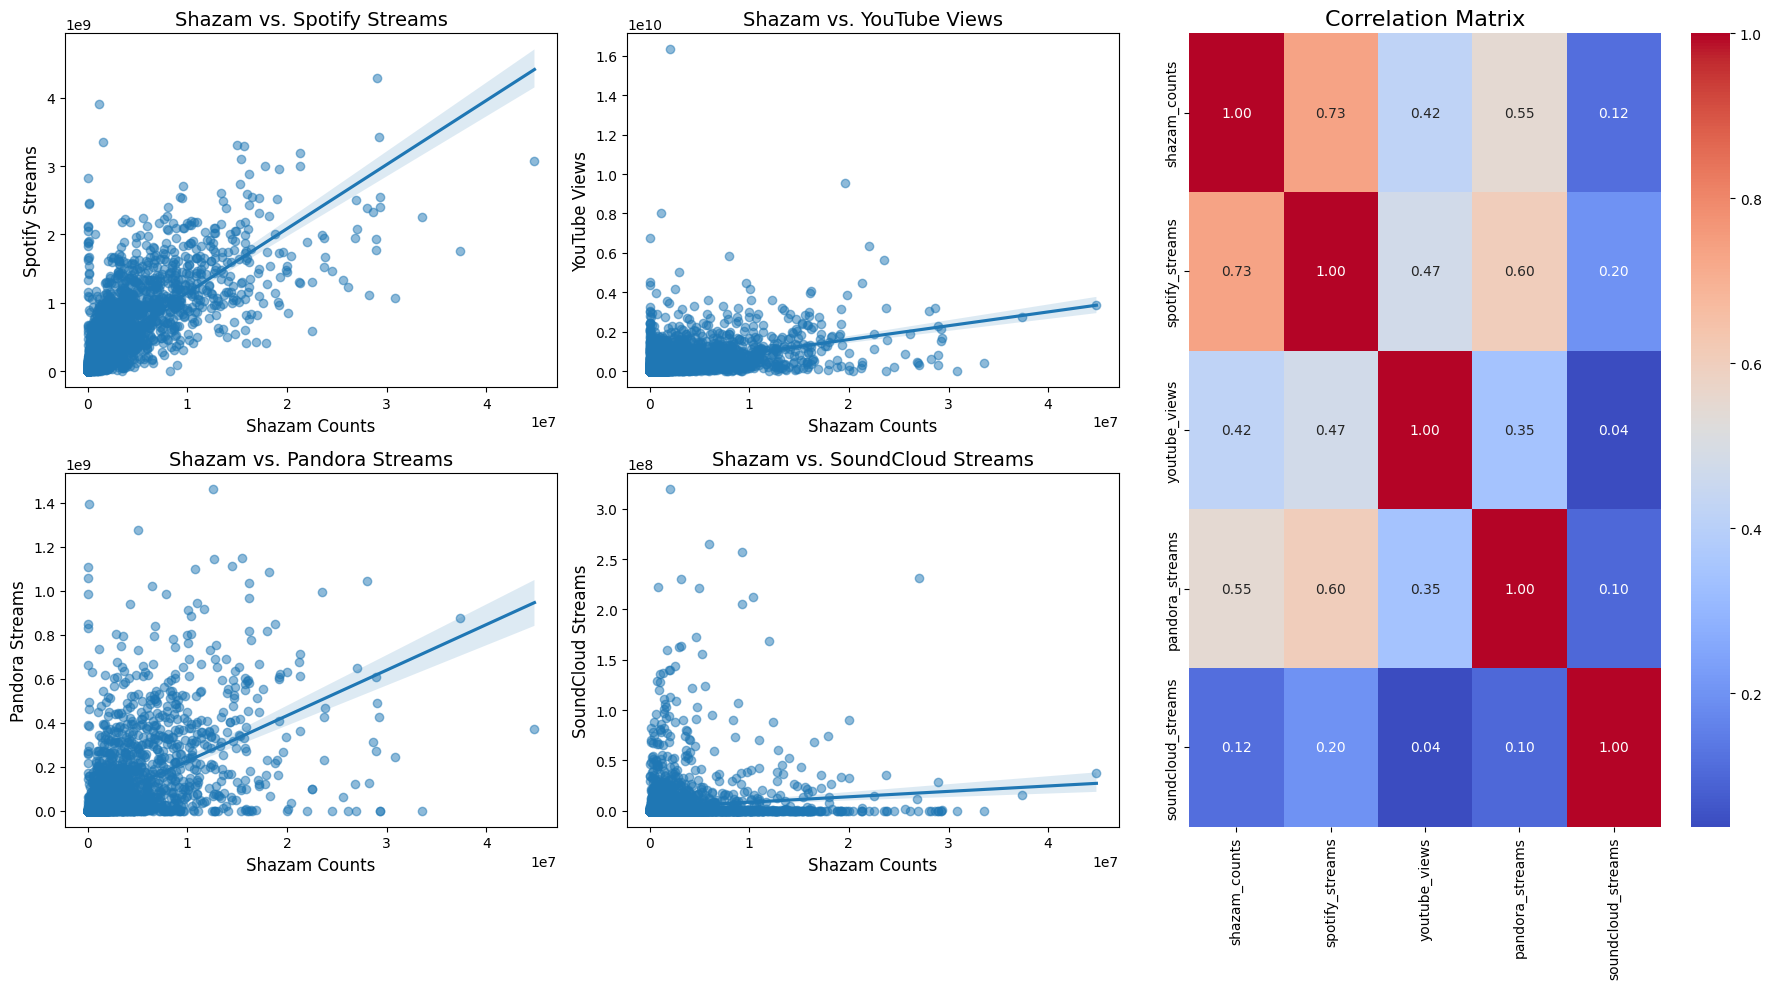

In [29]:
# Filter out songs with no Shazam activity
df_filtered = df[df['shazam_counts'] > 0]

# Map display names to actual columns
metrics_map = {
    "Spotify Streams": "spotify_streams",
    "YouTube Views": "youtube_views",
    "Pandora Streams": "pandora_streams",
    "SoundCloud Streams": "soundcloud_streams"
}

# Setup visualization
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1.2])  # Give more space to heatmap

# Create axes
axes = [
    fig.add_subplot(gs[0, 0]),
    fig.add_subplot(gs[0, 1]),
    fig.add_subplot(gs[1, 0]),
    fig.add_subplot(gs[1, 1])
]
heatmap_ax = fig.add_subplot(gs[:, 2])

# Plot each streaming service vs Shazam
for i, (label, col) in enumerate(metrics_map.items()):
    sns.regplot(x='shazam_counts', y=col, data=df_filtered, 
                scatter_kws={'alpha': 0.5}, ax=axes[i])
    axes[i].set_title(f"Shazam vs. {label}", fontsize=14)
    axes[i].set_xlabel("Shazam Counts", fontsize=12)
    axes[i].set_ylabel(label, fontsize=12)

# Correlation heatmap
cols_to_corr = ['shazam_counts'] + list(metrics_map.values())
corr = df_filtered[cols_to_corr].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", ax=heatmap_ax)
heatmap_ax.set_title("Correlation Matrix", fontsize=16)

plt.tight_layout()
plt.show()

## Correlation Analysis: Shazam Counts vs. Streaming Metrics

### Key Relationships:

1. **Spotify Streams vs. Shazam Counts**  
   - **Observation**: The scatter plot shows an upward trend with a regression line sloping upward.  
   - **Interpretation**: With a correlation coefficient of 0.73, there is a very strong positive relationship. This indicates that songs with higher Shazam counts tend to have significantly more Spotify streams.

2. **YouTube Views vs. Shazam Counts**  
   - **Observation**: The scatter plot shows a moderate upward trend.  
   - **Interpretation**: The correlation coefficient of 0.42 suggests a moderate positive relationship. Higher Shazam counts are associated with increased YouTube views, though the relationship is not as strong as with Spotify.

3. **Pandora Streams vs. Shazam Counts**  
   - **Observation**: The scatter plot displays a clear, moderate upward trend.  
   - **Interpretation**: A correlation coefficient of 0.55 indicates a moderate positive relationship, meaning that higher Shazam counts tend to predict higher Pandora streams.

4. **SoundCloud Streams vs. Shazam Counts**  
   - **Observation**: The scatter plot for SoundCloud streams shows only a very slight upward trend.  
   - **Interpretation**: With a correlation coefficient of 0.12, the relationship is very weak. This implies that Shazam counts are not a strong predictor of SoundCloud streaming success.

5. **Overall Correlation Matrix (Heatmap)**  
   - **Observation**: The heatmap visually summarizes the correlation coefficients between Shazam counts and each streaming metric.  
   - **Interpretation**: The heatmap confirms the variability in relationships across platforms—strong for Spotify, moderate for YouTube and Pandora, and weak for SoundCloud.